In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

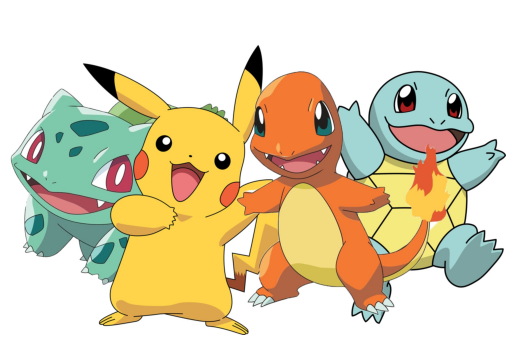

In [ ]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

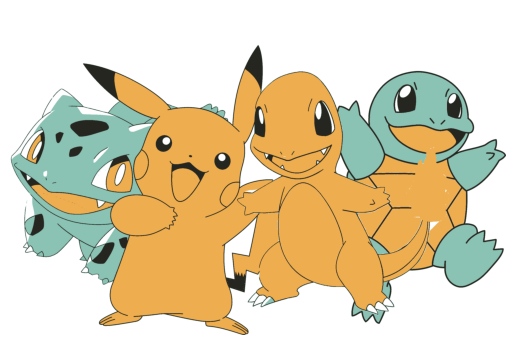

In [71]:
k = 4

# Reshape the image into a 2D array of pixels
pixels = image.reshape(-1, 3)

# Convert to float for better precision
pixels = np.float32(pixels)

# Define criteria for K-Means (stop after 100 iterations or when epsilon is 0.85)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 (original image format)
centers = np.uint8(centers)

# Map labels to cluster centers
segmented_pixels = centers[labels.flatten()]

# Reshape segmented pixels back to the original image shape
segmented_image = segmented_pixels.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_image)
plt.axis("off")
plt.show()

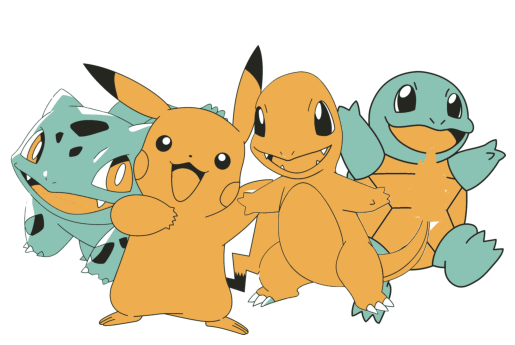

In [ ]:
k = 4

def kmeans(image, k):
    h, w, c = image.shape
    image_flat = image.reshape(h * w, c)
    image_flat = np.float32(image_flat)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(image_flat, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape((h, w, c))

    return segmented_image

segmented_image_k4 = kmeans(image, k)

plt.imshow(segmented_image_k4)
plt.axis("off")
plt.show()


In [73]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 734211,  304579, 2338997, 1779733]))